This is a stock market portfolio optimization project that involves analyzing price trends, calculating expected returns and volatilities, and determining the correlations between different stocks to achieve diversification.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = "https://statso.io/wp-content/uploads/2024/07/stock_data.csv"
data = pd.read_csv(url)
data.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-07-03,HDFCBANK.NS,1696.631836,1719.800049,1757.500000,1710.000000,1712.500000,22052058.0
1,2023-07-03,INFY.NS,1309.278564,1333.699951,1346.000000,1328.449951,1330.000000,7732412.0
2,2023-07-03,RELIANCE.NS,2405.791992,2414.290283,2420.105225,2358.587158,2361.079346,6077193.0
3,2023-07-03,TCS.NS,3216.993164,3272.300049,3318.800049,3268.750000,3314.300049,1687264.0
4,2023-07-04,HDFCBANK.NS,1704.918579,1728.199951,1747.000000,1713.800049,1723.449951,19397594.0


In [3]:
#Make a copy of the data
stock_data = data.copy()

In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       972 non-null    object 
 1   Ticker     972 non-null    object 
 2   Adj Close  972 non-null    float64
 3   Close      972 non-null    float64
 4   High       972 non-null    float64
 5   Low        972 non-null    float64
 6   Open       972 non-null    float64
 7   Volume     972 non-null    float64
dtypes: float64(6), object(2)
memory usage: 60.9+ KB


In [18]:
# Convert Date to Datetime format and set as index
date_format = "%Y-%m-%d"
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format=date_format)
stock_data.set_index('Date', inplace=True)



,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2023-07-03,HDFCBANK.NS,1696.631836,1719.800049,1757.500000,1710.000000,1712.500000,22052058.0
2023-07-03,INFY.NS,1309.278564,1333.699951,1346.000000,1328.449951,1330.000000,7732412.0
2023-07-03,RELIANCE.NS,2405.791992,2414.290283,2420.105225,2358.587158,2361.079346,6077193.0
2023-07-03,TCS.NS,3216.993164,3272.300049,3318.800049,3268.750000,3314.300049,1687264.0
2023-07-04,HDFCBANK.NS,1704.918579,1728.199951,1747.000000,1713.800049,1723.449951,19397594.0


In [13]:
# Define tickers
tickers = ['HDFCBANK.NS', 'INFY.NS', 'RELIANCE.NS', 'TCS.NS']
# Number of tickers
num_tickers = len(tickers)

TCS has the highest adjusted close prices followed by RELIANCE. The two exhibit upward trends which indicate a higher performance. HDFCBANK and INFY have relatively lower price fluctuations, thus exhibiting more stability.

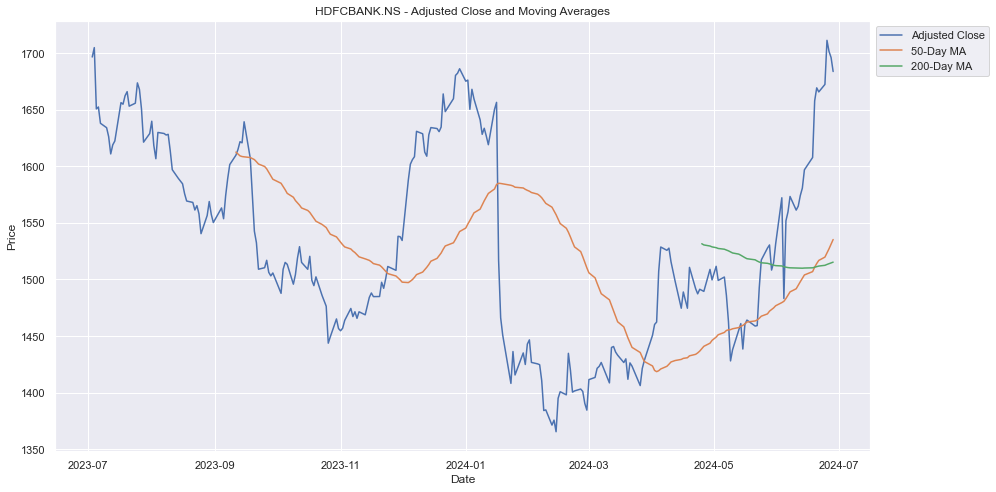

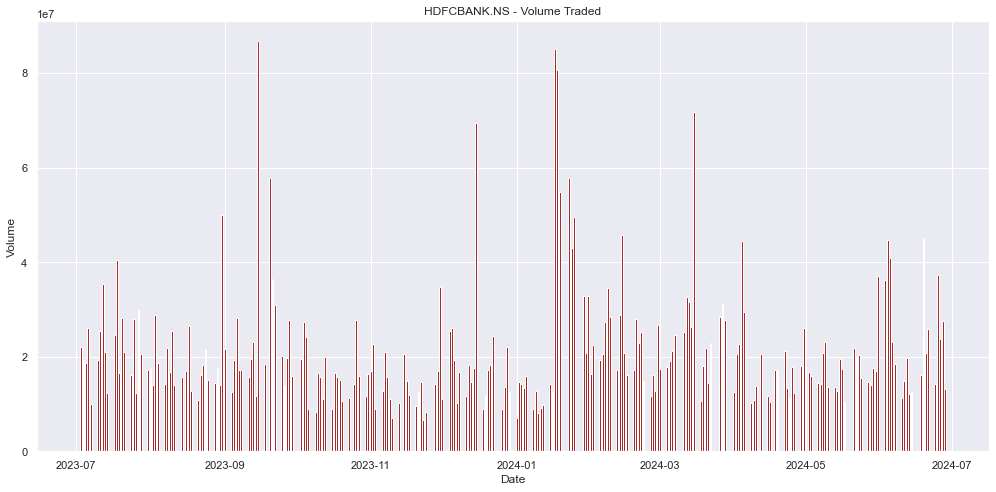

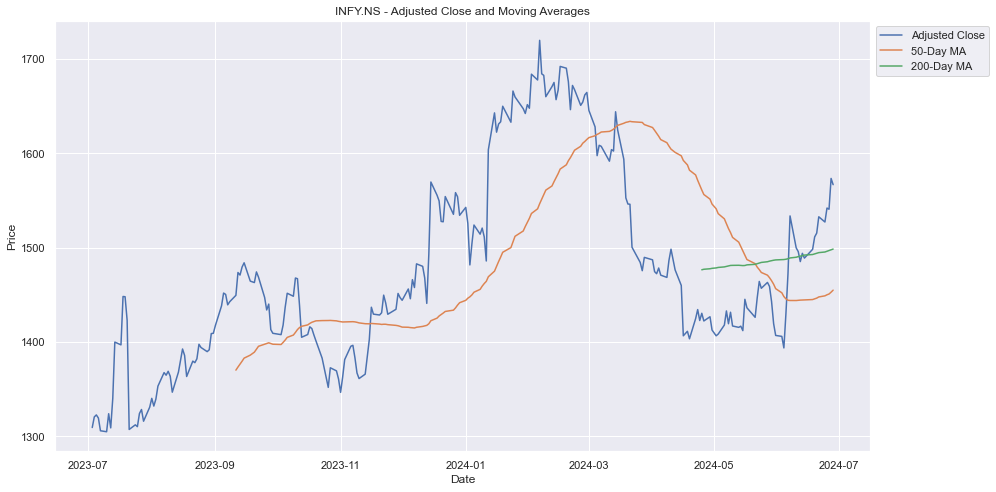

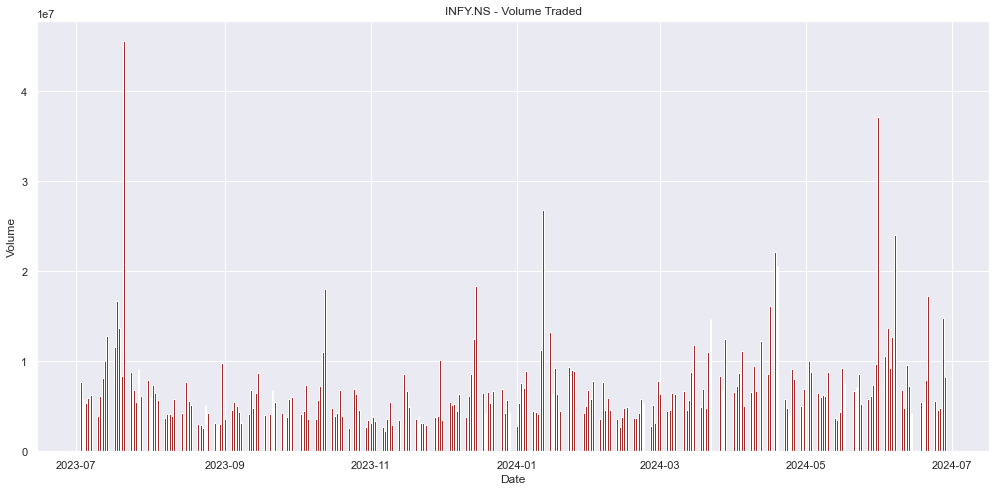

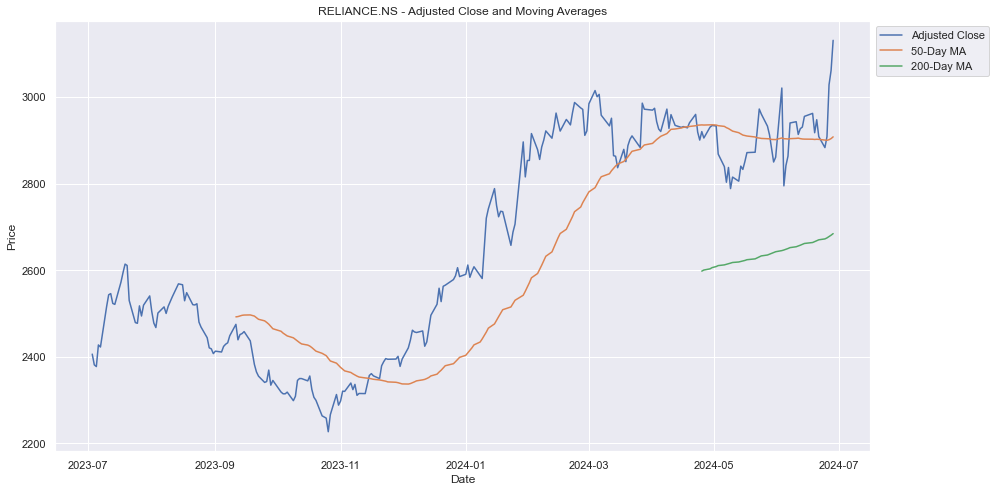

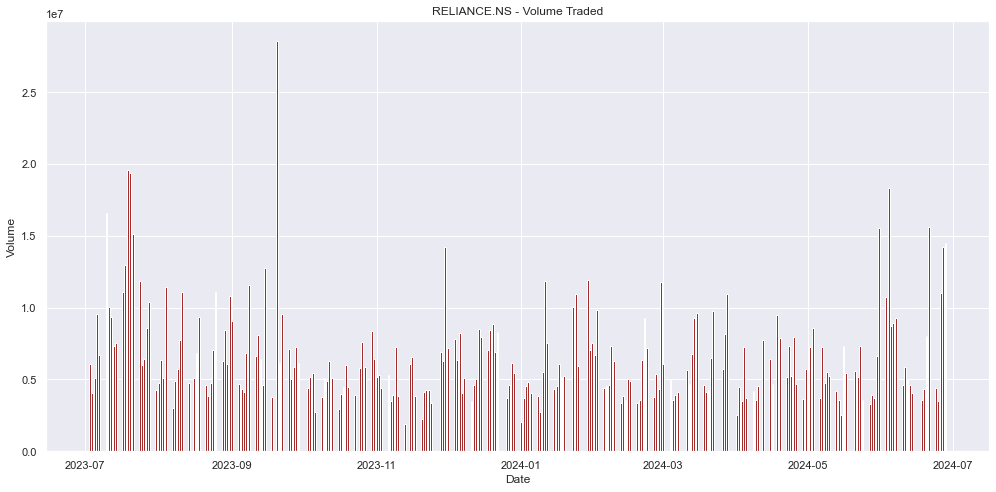

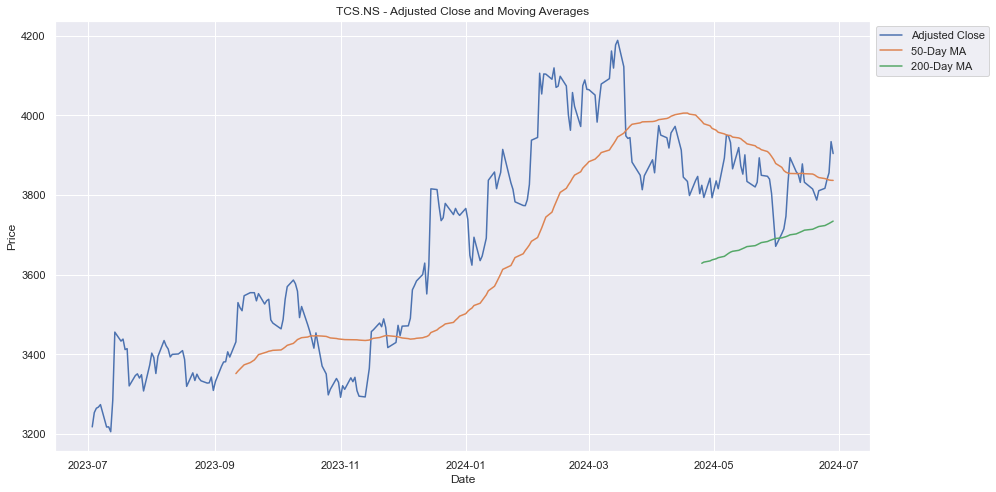

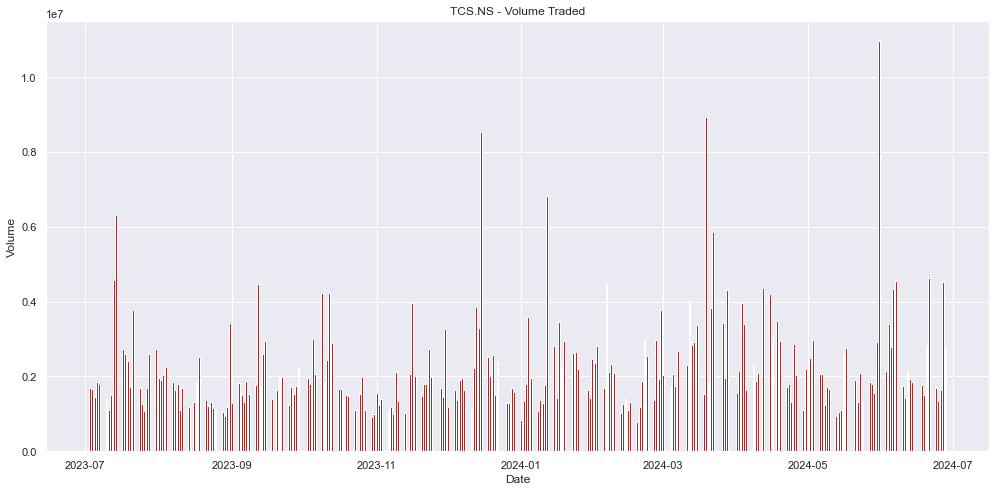

In [16]:

# Define short and long window periods
short_window = 50
long_window = 200

# Get the unique stock tickers
unique_tickers = stock_data['Ticker'].unique()

# Loop through each ticker to calculate and plot moving averages and volume
for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    
    # Calculate the moving averages
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()
    
    # Plot the Adjusted Close and Moving Averages
    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adjusted Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True, which='both')
    plt.xticks(rotation=360)
    plt.tight_layout()
    plt.show()
    
    # Plot the Volume Traded
    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='brown')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.grid(True)
    plt.xticks(rotation=360)
    plt.tight_layout()
    plt.show()


The HDFCBANK and INFY stocks , the prices first decline, then later show signs of recovery. For RELIANCE and TCS, the prices have a consistent upard trend, in their adjusted close prices. There are significant spikes at various points in the volume graphs, indicating high trading volumes. 

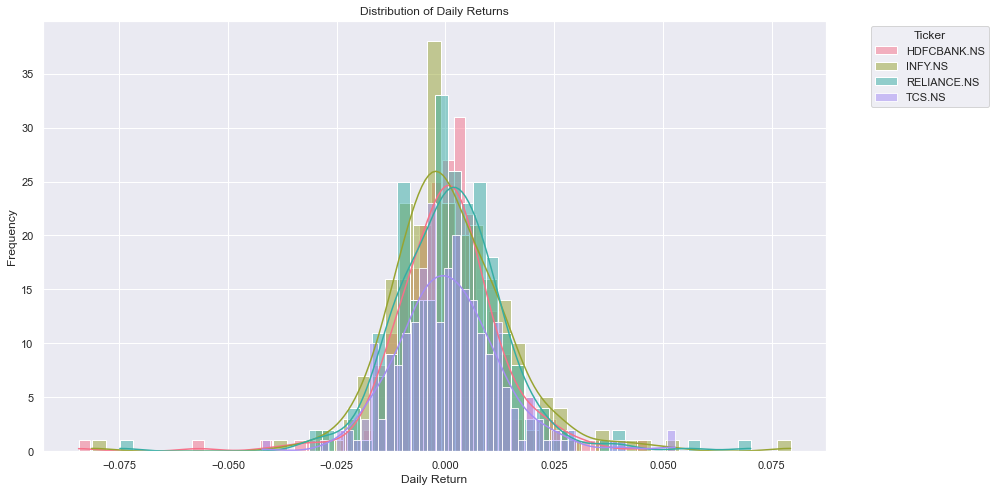

In [19]:
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()
# Prepare the figure for a combined histogram plot
plt.figure(figsize=(14, 7))
palette = sns.color_palette("husl", len(unique_tickers))
# Loop through each ticker to plot the distribution of daily returns
for idx, ticker in enumerate(unique_tickers):
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, color = palette[idx],  alpha=0.5)

# Set plot title and labels
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend(title='Ticker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both')
plt.tight_layout()

# Show plot
plt.show()

The distributions are approximately normal, centred around zero, which indicates that most daily returns are close to the average return. However, there are tails on both sides, which reflect occasional significant gains or losses. INFY and RELIANCE appear to have slightly wider distributions, which suggests higher volatility compared to HDFCBANK and TCS.

**Correlation in stocks**

In [20]:
daily_returns = stock_data.pivot_table(index='Date',columns='Ticker', values='Daily Return')
daily_returns

Ticker,HDFCBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,,
2023-07-04,0.004884,0.008585,-0.010303,0.011169
2023-07-05,-0.031767,0.001598,-0.001642,0.003355
2023-07-06,0.001016,-0.002524,0.020991,0.000888
2023-07-07,-0.008716,-0.010194,-0.001952,0.001911
2023-07-10,-0.002379,-0.000789,0.038521,-0.017211
...,...,...,...,...
2024-06-24,0.003992,-0.003621,-0.008750,0.001588
2024-06-25,0.023290,0.009691,0.008793,0.005672
2024-06-26,-0.005756,-0.000811,0.041175,0.004533


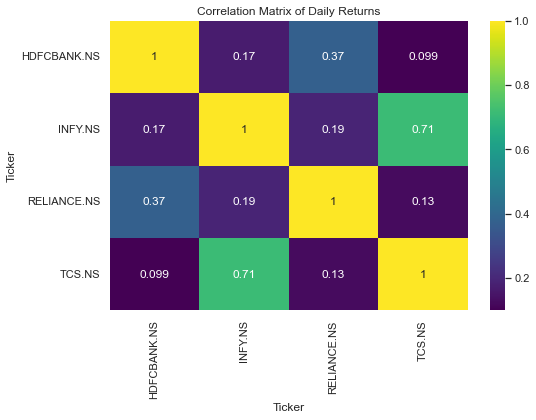

In [28]:

correlation_matrix = daily_returns.corr()
plt.figure(figsize = (8,6))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix of Daily Returns')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

INFY and TCS have a high positive correlation (0.71), which indicates that they tend to move in the same direction. 
HDFCBANK has a moderate positive correlation with RELIANCE (0.37) and a low correlation with INFY (0.17) and TCS (0.099).
RELIANCE shows a low correlation with INFY (0.19) and TCS (0.13).

These varying correlations suggest potential diversification benefits; combining stocks with lower correlations can reduce overall portfolio risk.

**Portfolio Optimization**

1. Calculate the expected returns and volatility for each stock
2. Generate a series of random portfolios to identify the efficient frontier
3. Optimize the portfolio to maximize the sharpe ratio

In [23]:
# Expected Returns Annualized
expected_returns = daily_returns.mean() * 252
volatility = daily_returns.std() * np.sqrt(252)

stock_stats = pd.DataFrame(
{
    'Expected Return': expected_returns,
    'Volatility': volatility
})
stock_stats


,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.013661,0.206910
INFY.NS,0.213798,0.232261
RELIANCE.NS,0.297343,0.214664
TCS.NS,0.220852,0.196869


RELIANCE has the highest expected return at 29.7% and a moderate volatility of 21.5%, indicating a potentially high reward investment with relatively higher risk. 

INFY and TCS also have high expeted returns of 21.4% and 22.1%, respectively, and moderate volatility of 23.33% and 19.7%. 

HDFCBANK has the lowest expected return of 1.4% and a moderate volatility of 20.7%, which makes it the least attractive in terms of adjusted returns.

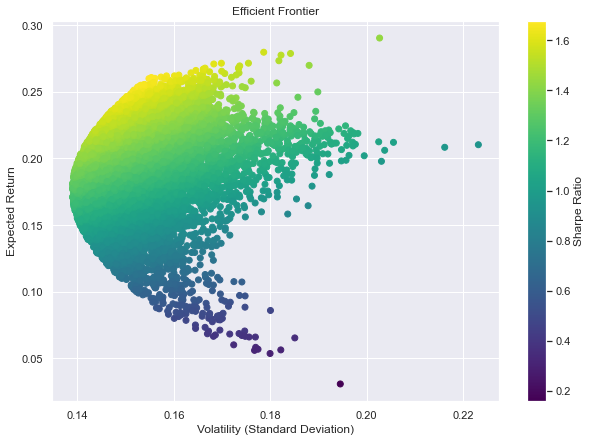

In [25]:
# Function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility
# Simulate 10000 portfolios
num_portfolios = 10000
# Array to store results
results = np.zeros((3, num_portfolios))
# Annualized Covariance 
cov_matrix = daily_returns.cov() * 252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)
    
    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
    
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return/portfolio_volatility #Sharpe Ratio
    
plt.figure(figsize = (10,7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap = 'viridis', marker = 'o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label = 'Sharpe Ratio')
plt.grid(True)
plt.show()
    

Each dot represents a portfolio, and the color indicates the Sharpe Ratio. Portfolios on the left side , close to the y axis offer the highest expected returns for a given volatility, i.e. optimal volatility. the gradiend shows that portfolios with Higher sharpe ratio(bright yellow) provide better risk-adjusted returns

In [26]:
# Identify portfolio ith maximum Sharpe Ratio
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio 

(0.26076539462645376, 0.15535419837197528, 1.6785217094814855)

The portfolio with the maximum sharpe ratio has the following Characteristics:
1. Expected Return ~26.08%
2. volatility ~15.54%
3. Sharpe Ratio ~1.68

Identify Weights of the stocks in the portfolio that yeild the maximum Sharpe ratio.

In [27]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)
    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
    
    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break
        
portfolio_weights_df = pd.DataFrame(
{
    'Ticker' : unique_tickers,
    'Weight': max_sharpe_weights
})
portfolio_weights_df
    

,Ticker,Weight
0,HDFCBANK.NS,0.308527
1,INFY.NS,0.105945
2,RELIANCE.NS,0.180185
3,TCS.NS,0.405343


The output gives a diversified portfolio with the following allocations:
1. HDFCBANK - 30.85%
2. INFY - 10.59%
3. RELIANCE - 18.02%
4. TCS - 40.53%

TCS has the highest allocation , while INFY has the smallest allocation.This balanced allocation aims to maximize returns while minimizing risk by leveraging individual stock performances and their correlations.